<a href="https://colab.research.google.com/github/zalfanurjihan/Zalfa-Projects/blob/main/Proyek_Akhir_Zalfa_Nurjihan_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Akhir : Klasifikasi Gambar**
**kelas "Belajar Machine Learning untuk Pemula" di Dicoding Academy.**

# **Self introduction**
Nama: Zalfa Nurjihan

Email: zalfanjihan@gmail.com

No WA: 083820963900

Akun Dicoding: https://www.dicoding.com/users/zalfanjihan

Kota Cimahi, Jawa Barat




# **Codelab**

Ensure that tensorflow used in Google Colab is version above 2.0.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Import Library

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

from sklearn import linear_model
from sklearn.model_selection import train_test_split

Accessing Dataset

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-27 07:29:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  15.2MB/s    in 22s     

2021-07-27 07:30:21 (14.2 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Extract the zip file

In [ ]:
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Creating rock paper scissors data folder



In [ ]:
pip install split-folders #https://pypi.org/project/split-folders/

In [ ]:
import os
fold_scissors = os.path.join('/tmp/rockpaperscissors/scissors')
fold_paper= os.path.join('/tmp/rockpaperscissors/paper')
fold_rock= os.path.join('/tmp/rockpaperscissors/rock')

print('Total number of scissors pictures:', len(os.listdir(fold_scissors)))
print('Total number of paper pictures:', len(os.listdir(fold_paper)))
print('Total number of rock pictures:', len(os.listdir(fold_rock)))

print("Display file names:") 
file_scissors = os.listdir(fold_scissors)
print("Scissors:",file_scissors[:3])
file_paper = os.listdir(fold_paper)
print("Paper:",file_paper[:3])
file_rock = os.listdir(fold_rock)
print("Rock:",file_rock[:3])

Total number of scissors pictures: 750
Total number of paper pictures: 712
Total number of rock pictures: 726
Display file names:
Scissors: ['a8DBHodNOhJCxQrN.png', '7M6QmAbgSaXFX9ES.png', 'gzAhbz3S2W0VukHE.png']
Paper: ['HXxUlm3O2djcDgUR.png', '2DQbLQfHlfrcATqi.png', 'tW1oIjn0hlGLToAY.png']
Rock: ['smfqjL7LuLnrPqo1.png', 'PqlEUvTdVyPPQUUI.png', 'oky5NsS9ymRXKVf8.png']


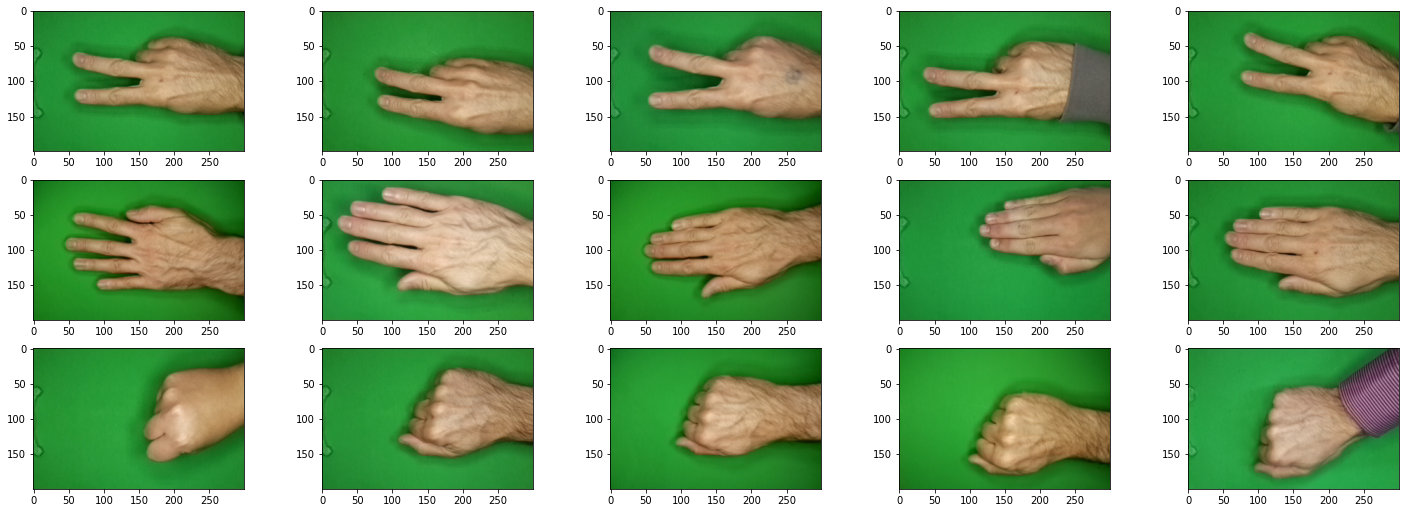

In [ ]:
%matplotlib inline

nrows = 3
ncols = 5

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 3) 

pic_index += 5
display_scissors = [os.path.join(fold_scissors, fname)
                  for fname in file_scissors[pic_index-5:pic_index]]
display_paper = [os.path.join(fold_paper, fname)
                  for fname in file_paper[pic_index-5:pic_index]]
display_rock = [os.path.join(fold_rock, fname)
                 for fname in file_rock[pic_index-5:pic_index]]

for i, img_path in enumerate(display_scissors+display_paper+display_rock):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Using Image Generator**

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# **Separating Data into Training and Validation**

In [ ]:
BASIS_DIR = "/tmp/rockpaperscissors/rps-cv-images/"
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')


validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BASIS_DIR = "/tmp/rockpaperscissors/rps-cv-images/"
train_datagen = ImageDataGenerator(
     rescale = 1./255,
     rotation_range = 60,
     horizontal_flip = True,
     shear_range = 0.2,
     zoom_range = 0.2,
     fill_mode = 'nearest')
train_datagen = ImageDataGenerator(validation_split=0.4)
test_datagen = ImageDataGenerator(
     rescale = 1./255,
     rotation_range = 60,
     horizontal_flip = True,
     shear_range = 0.2,
     zoom_range = 0.2,
     fill_mode = 'nearest')
test_datagen = ImageDataGenerator(validation_split=0.4)


In [ ]:
BASIS_DIR = "/tmp/rockpaperscissors/rps-cv-images/"
train_generator = train_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
    )
validation_generator = test_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (150, 150),
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Building an Artificial Neural Network Model - Sequential**

In [ ]:
import tensorflow as tf
import keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()   

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# **Training an Artificial Neural Network Model**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 4,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
    )

Epoch 1/25
4/4 - 5s - loss: 0.1488 - accuracy: 0.9219 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 2/25
4/4 - 4s - loss: 0.1041 - accuracy: 0.9219 - val_loss: 0.1786 - val_accuracy: 0.8984
Epoch 3/25
4/4 - 4s - loss: 0.1443 - accuracy: 0.8828 - val_loss: 0.1641 - val_accuracy: 0.9219
Epoch 4/25
4/4 - 4s - loss: 0.1935 - accuracy: 0.9141 - val_loss: 0.0527 - val_accuracy: 0.9609
Epoch 5/25
4/4 - 4s - loss: 0.1275 - accuracy: 0.9219 - val_loss: 0.1069 - val_accuracy: 0.9297
Epoch 6/25
4/4 - 4s - loss: 0.1105 - accuracy: 0.9219 - val_loss: 0.0820 - val_accuracy: 0.9609
Epoch 7/25
4/4 - 4s - loss: 0.1109 - accuracy: 0.9375 - val_loss: 0.0839 - val_accuracy: 0.9531
Epoch 8/25
4/4 - 4s - loss: 0.1009 - accuracy: 0.9388 - val_loss: 0.1967 - val_accuracy: 0.8750
Epoch 9/25
4/4 - 4s - loss: 0.1622 - accuracy: 0.8984 - val_loss: 0.1362 - val_accuracy: 0.9219
Epoch 10/25
4/4 - 4s - loss: 0.1192 - accuracy: 0.9219 - val_loss: 0.0797 - val_accuracy: 0.9609
Epoch 11/25
4/4 - 4s - loss: 0.0819 - a

# **Plotting Accuracy of Training and Validation**

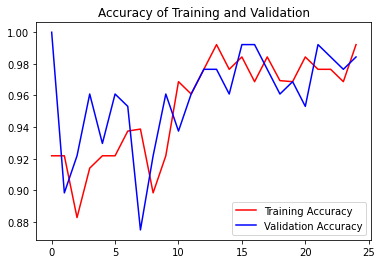

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy of Training and Validation')
plt.legend(loc=0)
plt.figure()
plt.show()


# **Image Classification Model Trial**

Saving 0Uomd0HvOB33m47I.png to 0Uomd0HvOB33m47I (1).png
0Uomd0HvOB33m47I.png
this hand forms PAPER


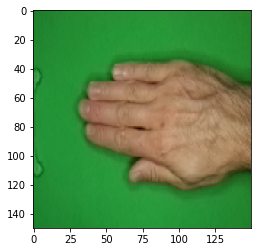

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes.any() == 0:
    print('this hand forms SCISSORS')
  
  elif classes.any() == 1:
    print('this hand forms PAPER')

  elif classes.any() == 2:
    print('this hand forms ROCK')